In [31]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as skl
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns


In [3]:
df = pd.read_csv('blood_pressure.csv')
df.dropna(inplace=True)
print(df.head())

         age         weight         bp class
0  20.866941  133881.395777        NaN   NaN
1  71.202835   72461.644794        NaN   NaN
2  68.694353  132123.346570        NaN   NaN
3  20.803871   71023.506894        NaN   NaN
4  23.845718   69070.444943  64.365643   low


In [ ]:
feature = ['age','weight']

X)

LinearRegression()

Statsmodels without interaction

In [26]:

fit1 = smf.ols('bp ~ age + weight', data=df).fit()
fit1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     bp   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1981.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          3.36e-131
Time:                        15:38:16   Log-Likelihood:                -627.36
No. Observations:                 200   AIC:                             1261.
Df Residuals:                     197   BIC:                             1271.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -22.2281      2.487     -8.937      0.000     -27.133     -17.323
age            1.0225      0.022     45.558      0.000       0.978       1.067
weight         0.0010   2.24e-05     45.110      0.000       0.001       0.001
==============================================================================
Omnibus:                        0.142   Durbin-Watson:                   1.883
Prob(Omnibus):                  0.932   Jarque-Bera (JB):                0.036
Skew:                          -0.029   Prob(JB):                        0.982
Kurtosis:                       3.032   Cond. No.                     6.13e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Statsmodel with interaction

In [28]:
fit2 =  smf.ols('bp ~ age*weight', data=df).fit()
fit2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     bp   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     1316.
Date:                Thu, 06 Feb 2025   Prob (F-statistic):          1.49e-129
Time:                        15:38:46   Log-Likelihood:                -627.23
No. Observations:                 200   AIC:                             1262.
Df Residuals:                     196   BIC:                             1276.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -25.0730      6.130     -4.090      0.000     -37.162     -12.984
age            1.0828      0.121      8.968      0.000       0.845       1.321
weight         0.0010   6.19e-05     16.798      0.000       0.001       0.001
age:weight  -6.22e-07   1.22e-06     -0.508      0.612   -3.04e-06    1.79e-06
==============================================================================
Omnibus:                        0.097   Durbin-Watson:                   1.882
Prob(Omnibus):                  0.952   Jarque-Bera (JB):                0.032
Skew:                          -0.031   Prob(JB):                        0.984
Kurtosis:                       3.004   Cond. No.                     7.83e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.83e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

is the interaction significant

In [30]:
from statsmodels.stats.anova import anova_lm

anova_lm(fit1, fit2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,197.0,6210.657508,0.0,NaN,NaN,NaN
1,196.0,6202.492296,1.0,8.165213,0.258022,0.612053


we do not see significance considering the interaction term

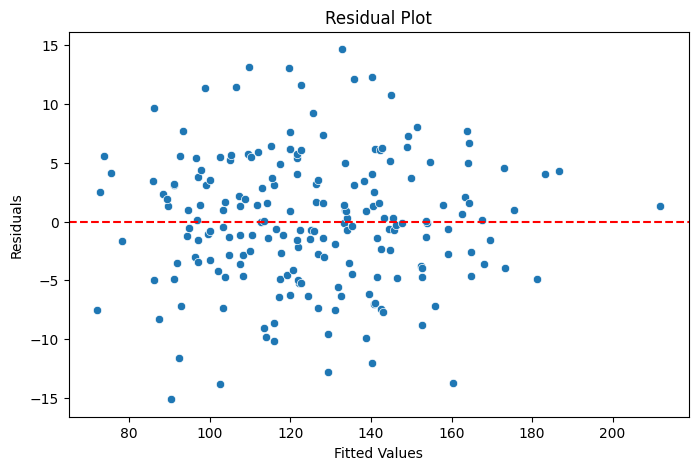

In [32]:

# Get residuals
residuals = fit1.resid  # Residuals: observed - predicted
fitted_values =fit1.fittedvalues  # Predicted values from the model

# Create residual plot
plt.figure(figsize=(8, 5))
sns.scatterplot(x=fitted_values, y=residuals)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at 0
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [33]:
fit1.predict({'age': [12,60], 'weight': [35000,250000]})

0     25.387503
1    291.589314
dtype: float64

#RIP

In [34]:
import pyreadr

In [48]:
ALSDF = pyreadr.read_r('ALS_progression_rate.1822x370.rds')[None]
ALSDF = ALSDF.dropna()
ALSDF.columns = ALSDF.columns.str.replace(r'[^a-zA-Z0-9_]', '_', regex=True)

from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

np.random.seed(69)

target = 'dFRS'
predictors = ' + '.join(ALSDF.columns.difference([target]))
formula = f'{target} ~ {predictors}'
model = smf.ols(formula, data=ALSDF).fit()

ALSDF['pred'] = model.predict(ALSDF)

Train_RMSE = np.sqrt(mean_squared_error(ALSDF['dFRS'], ALSDF['pred']))
print(f"Training RMSE: {Train_RMSE:.4f}")

X = ALSDF.drop(columns=[target, 'pred'])
y = ALSDF[target]

cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=69)

lm = LinearRegression()

cv_rmse_scores = np.sqrt(-cross_val_score(lm, X, y, cv=cv, scoring='neg_mean_squared_error'))
cv_rmse_mean = np.mean(cv_rmse_scores)

print(f"Cross-Validation RMSE (10-fold, 5 repeats): {cv_rmse_mean:.4f}")


Training RMSE: 0.4206
Cross-Validation RMSE (10-fold, 5 repeats): 0.5980
